<a href="https://colab.research.google.com/github/Valeria-YL/2047880MINERIA/blob/main/Practicas/Practica_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 7 - Data clustering

In [1]:
import kagglehub
import os
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
import numpy as np

path = kagglehub.dataset_download("sumedh1507/blood-donor-dataset")
df = pd.read_csv(os.path.join(path, "blood_donor_dataset.csv"))

Using Colab cache for faster access to the 'blood-donor-dataset' dataset.


**Preparación de los datos.**

Primero creé un subconjunto de los datos con las columnas necesarias y, a continuación, utilizaré la codificación one-hot para transformar las variables categóricas en vectores numéricos binarios.

Selecciono únicamente las columnas '*blood_group*' y '*availability*' del DataFrame, y las almaceno en una nueva variable *X* .

In [2]:
features = ['blood_group', 'availability']
X = df[features]

Ahora, se aplica la codificación one-hot a las variables categóricas contenidas en X .


In [3]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X)

Después se aplica el algoritmo de K-Means clustering sobre los datos previamente codificados con one-hot. Primero, se asigna la matriz *X_encoded* (que contiene las variables categóricas transformadas en formato numérico) a *X_kmean*s.


In [4]:
X_kmeans = X_encoded

# Aplica K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_kmeans)

print("Agrupamiento K-Means aplicado con K=3.")

Agrupamiento K-Means aplicado con K=3.


 Se crea un nuevo DataFrame llamado *X_encoded_df* que contiene las variables categóricas ya transformadas mediante codificación one-hot.


In [5]:
feature_names = encoder.get_feature_names_out(features)
X_encoded_df= pd.DataFrame(X_encoded, columns=feature_names)

print("Primeras filas de los datos codificados")
print(X_encoded_df.head())

Primeras filas de los datos codificados
   blood_group_A-  blood_group_AB+  blood_group_AB-  blood_group_B+  \
0             0.0              0.0              0.0             0.0   
1             0.0              0.0              1.0             0.0   
2             0.0              1.0              0.0             0.0   
3             1.0              0.0              0.0             0.0   
4             0.0              0.0              0.0             0.0   

   blood_group_B-  blood_group_O+  blood_group_O-  availability_Yes  
0             0.0             0.0             0.0               0.0  
1             0.0             0.0             0.0               1.0  
2             0.0             0.0             0.0               1.0  
3             0.0             0.0             0.0               0.0  
4             0.0             0.0             1.0               0.0  


`La fila 2 tiene blood_group_AB+ = 1.0 y availability_Yes = 1.0, lo que indica que esa persona tiene grupo sanguíneo AB+ y está disponible.`

`La fila 4 tiene blood_group_O- = 1.0 y availability_Yes = 0.0, lo que indica grupo O- y no disponible. `





**Determinar el número óptimo de clústeres**

Para seleccionar el número óptimo de cluster para K-Means, utilizaré el método del codo.

In [6]:
inercia = []
K_range = range(2, 11)

for k in K_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model.fit(X_encoded_df)
    inercia.append(kmeans_model.inertia_)

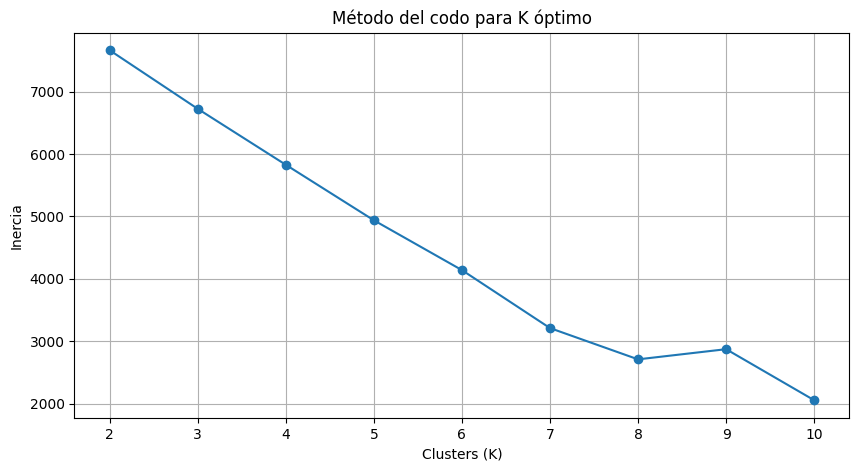

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(K_range, inercia, marker='o')
plt.title('Método del codo para K óptimo')
plt.xlabel('Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(K_range)
plt.grid(True)
plt.show()

**Creación y prueba del modelo K-Means**

Elegí el valor de K=5 y ajusté el modelo.

In [8]:
k_optima = 5

kmeans_model = KMeans(n_clusters=k_optima, random_state=42, n_init=10)
df['cluster'] = kmeans_model.fit_predict(X_encoded_df)

print(f"\n Modelo K-Means (K={k_optima}) ajustado.")


 Modelo K-Means (K=5) ajustado.


Se realiza un análisis posterior al agrupamiento por K-Means, comenzando con la inspección del tamaño de cada cluster mediante un conteo de observaciones asignadas a cada grupo, para detectar si hay desequilibrios o agrupamientos dominantes. Luego, se agrupan los datos por número de cluster y calcula el valor más frecuente dentro de cada grupo.


In [9]:
print("\nCantidad de elementos por cluster:")
print(df['cluster'].value_counts().sort_index())

cluster_analisis = df.groupby('cluster')[features].agg(lambda x: x.mode()[0])
print("\nValores más frecuentes:")
print(cluster_analisis)


Cantidad de elementos por cluster:
cluster
0    3088
1    1282
2    1240
3    3154
4    1236
Name: count, dtype: int64

Valores más frecuentes:
        blood_group availability
cluster                         
0               AB-           No
1                B+           No
2                O+          Yes
3                B-          Yes
4                A-          Yes


Utilizando gráficos de barras visualizamosr cómo se distribuyen las variables categóricas '*blood_group*' y '*availability*' dentro de cada cluster identificado por K-Means.

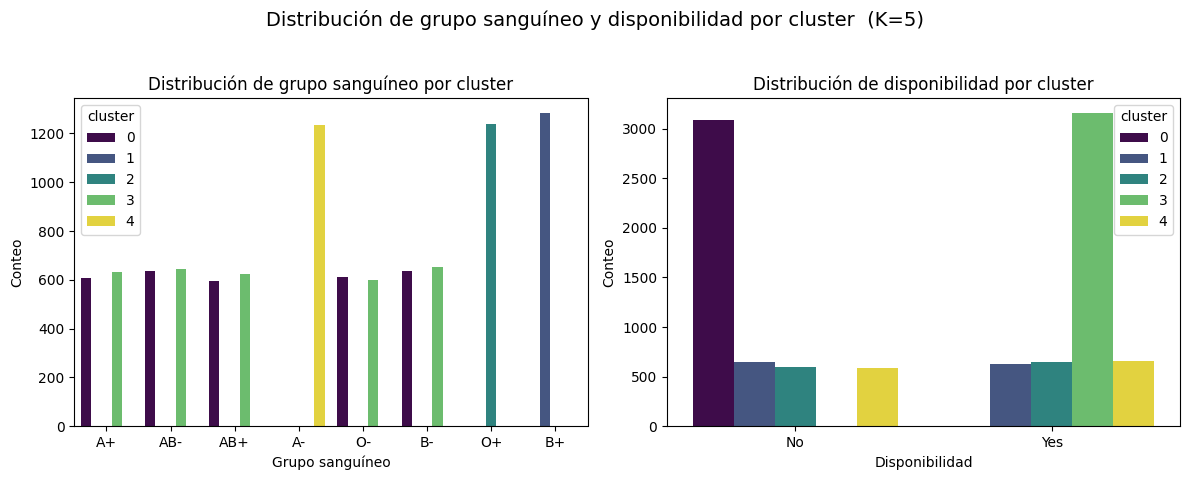

In [10]:
plt.figure(figsize=(12, 5))
plt.suptitle(f'Distribución de grupo sanguíneo y disponibilidad por cluster  (K={k_optima})', fontsize=14)

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='blood_group', hue='cluster', palette='viridis')
plt.title('Distribución de grupo sanguíneo por cluster')
plt.xlabel('Grupo sanguíneo')
plt.ylabel('Conteo')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='availability', hue='cluster', palette='viridis')
plt.title('Distribución de disponibilidad por cluster')
plt.xlabel('Disponibilidad')
plt.ylabel('Conteo')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()